In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBRegressor
from sklearn.decomposition import PCA

In [4]:
boston = pd.read_csv('p2_mod.csv')
X = boston.drop(columns='Y', axis=1)
Y = boston['Y']
print(X)

           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...     X14    X15    X16  \
0       20000   2   2   1  24   2   2  -1  -1   -2  ...     689      0      0   
1      120000   2   2   2  26  -1   2   0   0    0  ...    2682   3272   3455   
2       90000   2   2   2  34   0   0   0   0    0  ...   13559  14331  14948   
3       50000   2   2   1  37   0   0   0   0    0  ...   49291  28314  28959   
4       50000   1   2   1  57  -1   0  -1   0    0  ...   35835  20940  19146   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...     ...    ...    ...   
29995  220000   1   3   1  39   0   0   0   0    0  ...  208365  88004  31237   
29996  150000   1   3   2  43  -1  -1  -1  -1    0  ...    3502   8979   5190   
29997   30000   1   2   2  37   4   3   2  -1    0  ...    2758  20878  20582   
29998   80000   1   3   1  41   1  -1   0   0    0  ...   76304  52774  11855   
29999   50000   1   2   1  46   0   0   0   0    0  ...   49764  36535  32428   

         X17    X18    X19 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

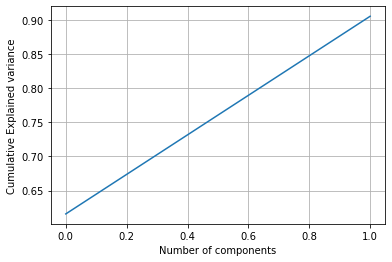

In [6]:
pca_test = PCA(0.90, random_state=7)
pca_test.fit(X_train)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained variance")
plt.grid()

Number of components explaining 90% varience: 1


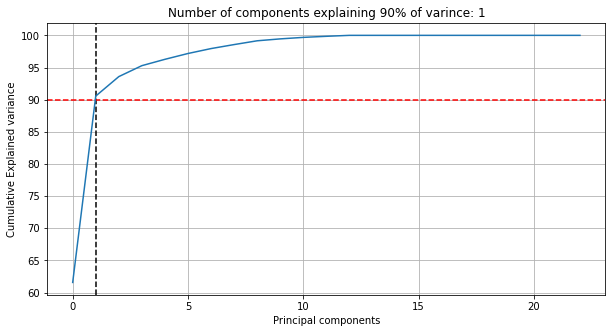

In [7]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA(random_state=7)
pca.fit(X_train)

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

k = np.argmax(var_cumu>90)
print("Number of components explaining 90% varience: "+ str(k))

plt.figure(figsize=[10,5])

plt.title("Number of components explaining 90% of varince: "+ str(k))
plt.ylabel("Cumulative Explained variance")
plt.xlabel("Principal components")
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=90, color='r', linestyle='--')

plt.grid()

ax = plt.plot(var_cumu)

In [8]:
n_PCA_components = 13
pca = PCA(n_components=n_PCA_components)
train_PCA = pca.fit_transform(X_train)
test_PCA = pca.transform(X_test)

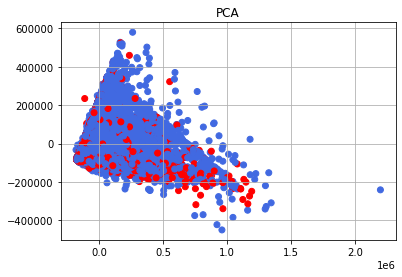

In [9]:
from pylab import *
title("PCA")
colors = ['royalblue','red','deeppink','maroon','mediumorchid','tan','forestgreen','olive','goldenrod','lightcyan','navy','green']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(train_PCA[:,0], train_PCA[:,1], c = vectorizer(y_train))
plt.grid()

In [10]:
train_PCA.shape

(22500, 13)

In [11]:
test_PCA.shape

(7500, 13)

In [12]:
explained_variance = pca.explained_variance_ratio_

In [13]:
explained_variance

array([0.61566985, 0.28989216, 0.03027109, 0.01703106, 0.00986304,
       0.00905384, 0.007654  , 0.00621805, 0.00588897, 0.00296904,
       0.00233936, 0.00167125, 0.00147829])

In [14]:
X_train.shape, X_test.shape

((22500, 23), (7500, 23))

In [15]:
from sklearn.linear_model import LogisticRegression

import datetime
start = datetime.datetime.now()
classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(X_train, y_train)

end = datetime.datetime.now()

print("Total execution time with LDA is: ", end-start)

Total execution time with LDA is:  0:00:00.288203


In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn import metrics
print("Test Accuracy on without PCA = ", metrics.accuracy_score(y_test, y_pred)*100)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

from sklearn.metrics import classification_report

print("Classification report without PCA: \n", classification_report(y_test, y_pred, digits=4))

Test Accuracy on without PCA =  77.65333333333334
[[5824    1]
 [1675    0]]
Classification report without PCA: 
               precision    recall  f1-score   support

           0     0.7766    0.9998    0.8742      5825
           1     0.0000    0.0000    0.0000      1675

    accuracy                         0.7765      7500
   macro avg     0.3883    0.4999    0.4371      7500
weighted avg     0.6032    0.7765    0.6790      7500



In [18]:
train_PCA.shape, test_PCA.shape

((22500, 13), (7500, 13))

In [19]:
import datetime

stack = datetime.datetime.now()

classifier1 = LogisticRegression(random_state=0, max_iter=1000)
classifier1.fit(train_PCA, y_train)

end = datetime.datetime.now()

print("Total execution time with LDA is: ", end-start)

Total execution time with LDA is:  0:00:36.450542


In [20]:
y_pred1 = classifier1.predict(test_PCA)

In [21]:
from sklearn import metrics

print("Test accuracy on with PCA = ", metrics.accuracy_score(y_test, y_pred1)*100)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import classification_report

print("Classification report withour PCA: \n", classification_report(y_test, y_pred, digits=4))

Test accuracy on with PCA =  50.73333333333333
[[5824    1]
 [1675    0]]
Classification report withour PCA: 
               precision    recall  f1-score   support

           0     0.7766    0.9998    0.8742      5825
           1     0.0000    0.0000    0.0000      1675

    accuracy                         0.7765      7500
   macro avg     0.3883    0.4999    0.4371      7500
weighted avg     0.6032    0.7765    0.6790      7500



In [ ]:
#SVM

In [22]:
from sklearn import svm
from sklearn.svm import SVC

In [24]:
svm = svm.SVC()
svm.fit(train_PCA, y_train)
svm.score(train_PCA, y_train)

0.7798666666666667

In [26]:
svm_score = svm.score(test_PCA, y_test)*100
print("SVM Accuracy:", svm_score)

SVM Accuracy: 77.68


In [ ]:
#KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
classifier = KNeighborsClassifier(n_neighbors = 81)
classifier.fit(X_train, y_train)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
score = knn.score(X_test,y_test)
print("KNN Algorithm Score:", score*100)

KNN Algorithm Score: 75.02666666666667


In [29]:
#DecisionTree
dclf = DecisionTreeClassifier()
dclf.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
j=dclf.score(X_test,y_test)
print("Decision Tree Algorithm Score:",j*100)

Decision Tree Algorithm Score: 72.05333333333334


In [31]:
#randomForest
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state = 0, n_jobs = -1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test,y_pred)*100
    print("Random Forest Accuracy:", score)

In [32]:
run_randomForest(X_train, X_test, y_train, y_test)

Random Forest Accuracy: 81.52000000000001


In [33]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)
lr = model.score(X_test, y_test)*100
print("Logistic Regression Accuracy:", lr)

Logistic Regression Accuracy: 77.62666666666667


F:\Anaconda_Python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
